In [1]:
from graph_tool import Graph
from graph_tool.draw import graph_draw

In [2]:
graph = Graph()

In [3]:
n = 10
m = 2
graph.add_vertex(n=n)

<generator object Graph.add_vertex.<locals>.<genexpr> at 0x7f17f7957200>

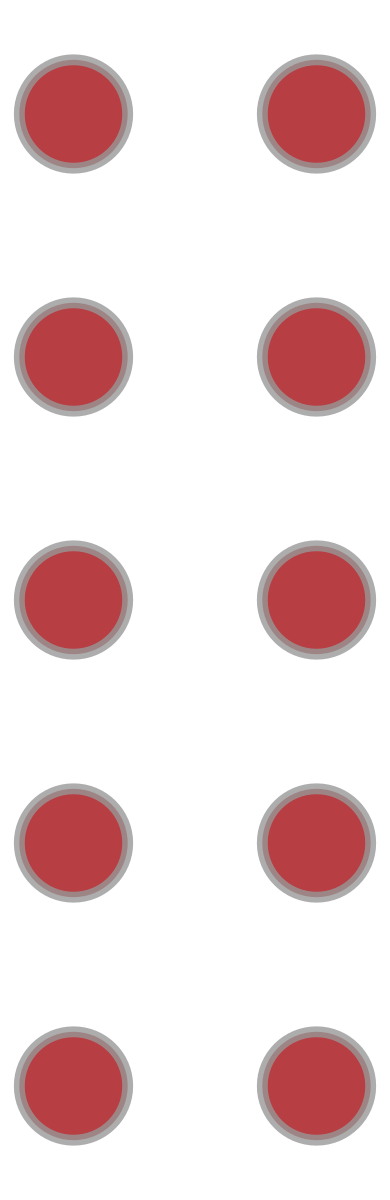

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f18867596a0, at 0x7f17f79698b0>

In [4]:
pos = graph.new_vertex_property(value_type="vector<float>")
id = graph.new_vertex_property(value_type="int")
block_counts = graph.new_vertex_property(value_type="vector<int>")
for v in range(0,n):
    vertex = graph.vertex(v)
    x = v % m
    y = v // m
    if ( (y+1) * m >= n):
        disp = ((y+1) * m - n) / 2
        x += disp
    pos[vertex] = [x, y]
    id[vertex] = v + 1

    count = [0 for i in range(0, n)]
    count[v] += 1
    block_counts[vertex] = count

graph_draw(graph, pos=pos)

In [5]:
from graph_tool.inference import minimize_blockmodel_dl

In [6]:
partition = minimize_blockmodel_dl(graph, B_min=n, B_max=n)

In [8]:
output = None
#output = "~/Jormungandr/nips/img/" + str(n) + "-vertical-legend.png"
partition.draw(pos=pos, output=output, vertex_shape="pie", vertex_pie_fractions=block_counts, vprops={"text":id})

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f18867596a0, at 0x7f18867593a0>